# K-means clustering

## import library

In [694]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [695]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

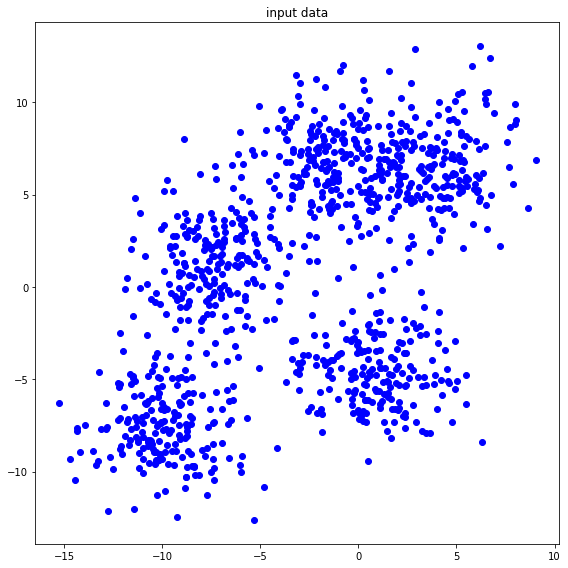

In [696]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [697]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # 
    num_data = feature.shape[0]
    dist = feature - center
    dist = np.dot(dist, dist.T)
    dist = (np.sqrt(np.diag(dist))).reshape(num_data,1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return dist


array([[1.41421356],
       [0.        ],
       [2.82842712]])

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [698]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    is_that_label = np.array(label_feature == label).flatten()
    selected_feature = np.array(feature[is_that_label])
    feature_mean = np.mean(selected_feature, axis = 0)
    
    dist = compute_distance(selected_feature, feature_mean)
    min_dist = np.min(dist, axis=0)

    # mean은 data set 중 하나의 point 이어야 함
    is_mean_point = np.array(dist == min_dist).flatten()

    centroid = selected_feature[is_mean_point]
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [699]:
def compute_loss(feature, centroid, label_feature, label):
  
    is_that_label = np.array(label_feature == label).flatten()
    selected_feature = np.array(feature[is_that_label])

    dist = compute_distance(selected_feature, centroid)
    loss = np.sum(dist, axis=0)

    return loss





def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    num_data = distance.shape[0]
    num_k = distance.shape[1]
    # 각 행의 최솟값을 고른다. k0 or k1
    label_feature = np.argmin(distance, axis=1).reshape(num_data,1)


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


array([[0],
       [1],
       [0],
       [1]], dtype=int64)

## the number of clusters $K = 2$

In [700]:
number_cluster          = 2
number_iteration        = 1000     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
# randomly initialize (첫번째 단계 : 랜덤으로 각각의 포인트마다 라벨 정해준다.)
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [701]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros(shape=(number_data, number_cluster))
centroid = np.zeros(shape=(number_cluster, number_feature))
for i in range(number_iteration):
  loss = 0
  for k in range(number_cluster):

    try :
      centroid[k] = compute_centroid(feature, label_feature_02, k)
    except :
      centroid[k] = centroid_iteration_02[i-1][k]

    distance[:, k : k+1] = compute_distance(feature, centroid[k])
    loss += compute_loss(feature, centroid[k], label_feature_02, k)

  label_feature_02 = compute_label(distance)

  loss_iteration_02[i] = loss / number_data
  centroid_iteration_02[i] = centroid

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [702]:
number_cluster          = 4
number_iteration        = 1000     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [703]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros(shape=(number_data, number_cluster))
centroid = np.zeros(shape=(number_cluster, number_feature))
for i in range(number_iteration):
  loss = 0
  for k in range(number_cluster):

    try :
      centroid[k] = compute_centroid(feature, label_feature_04, k)
    except :
      centroid[k] = centroid_iteration_04[i-1][k]

    distance[:, k : k+1] = compute_distance(feature, centroid[k])
    loss += compute_loss(feature, centroid[k], label_feature_04, k)

  label_feature_04 = compute_label(distance)

  loss_iteration_04[i] = loss / number_data
  centroid_iteration_04[i] = centroid

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [704]:
number_cluster          = 8
number_iteration        = 1000     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [705]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros(shape=(number_data, number_cluster))
centroid = np.zeros(shape=(number_cluster, number_feature))

for i in range(number_iteration):
  loss = 0
  for k in range(number_cluster):
    try :
      centroid[k] = compute_centroid(feature, label_feature_08, k)
    except :
      centroid[k] = centroid_iteration_08[i-1][k]

    distance[:, k : k+1] = compute_distance(feature, centroid[k])
    loss += compute_loss(feature, centroid[k], label_feature_08, k)

  label_feature_08 = compute_label(distance)

  loss_iteration_08[i] = loss / number_data
  centroid_iteration_08[i] = centroid

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [706]:
number_cluster          = 16
number_iteration        = 1000     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [707]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros(shape=(number_data, number_cluster))
centroid = np.zeros(shape=(number_cluster, number_feature))
for i in range(number_iteration):
  loss = 0
  for k in range(number_cluster):
    try :
      centroid[k] = compute_centroid(feature, label_feature_16, k)
    except :
      centroid[k] = centroid_iteration_16[i-1][k]
    distance[:, k : k+1] = compute_distance(feature, centroid[k])
    loss += compute_loss(feature, centroid[k], label_feature_16, k)

  label_feature_16 = compute_label(distance)

  loss_iteration_16[i] = loss / number_data
  centroid_iteration_16[i] = centroid

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [708]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [709]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [710]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [711]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [712]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [713]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [714]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [715]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [716]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    for i in range(2):
      plt.plot(centroid_iteration_02[:, i, 0], centroid_iteration_02[:, i, 1], label = "cluster {}".format(i))
      plt.plot(centroid_iteration_02[0, i, 0], centroid_iteration_02[0, i, 1], 'o', color = "blue")
      plt.plot(centroid_iteration_02[number_iteration - 1, i, 0], centroid_iteration_02[number_iteration - 1, i, 1], 's', color = "red")

    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [717]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(4):
      plt.plot(centroid_iteration_04[:, i, 0], centroid_iteration_04[:, i, 1], label = "cluster {}".format(i))
      plt.plot(centroid_iteration_04[0, i, 0], centroid_iteration_04[0, i, 1], 'o', color = "blue")
      plt.plot(centroid_iteration_04[number_iteration - 1, i, 0], centroid_iteration_04[number_iteration - 1, i, 1], 's', color = "red")

    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [718]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(8):
      plt.plot(centroid_iteration_08[:, i, 0], centroid_iteration_08[:, i, 1], label = "cluster {}".format(i))
      plt.plot(centroid_iteration_08[0, i, 0], centroid_iteration_08[0, i, 1], 'o', color = "blue")
      plt.plot(centroid_iteration_08[number_iteration - 1, i, 0], centroid_iteration_08[number_iteration - 1, i, 1], 's', color = "red")

    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [719]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(16):
      plt.plot(centroid_iteration_16[:, i, 0], centroid_iteration_16[:, i, 1], label = "cluster {}".format(i))
      plt.plot(centroid_iteration_16[0, i, 0], centroid_iteration_16[0, i, 1], 'o', color = "blue")
      plt.plot(centroid_iteration_16[number_iteration - 1, i, 0], centroid_iteration_16[number_iteration - 1, i, 1], 's', color = "red")

    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [720]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(2):
        cluster_value = i
        bool_feature = np.array(label_feature_02 == cluster_value).flatten()
        sect_feature = np.array(feature[bool_feature])
        plt.plot(sect_feature[:, 0], sect_feature[:, 1], 'o', label = "cluster {}".format(i))
        

    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [721]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(4):
        cluster_value = i
        bool_feature = np.array(label_feature_04 == cluster_value).flatten()
        sect_feature = np.array(feature[bool_feature])
        plt.plot(sect_feature[:, 0], sect_feature[:, 1], 'o', label = "cluster {}".format(i))
        

    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [722]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(8):
        cluster_value = i
        bool_feature = np.array(label_feature_08 == cluster_value).flatten()
        sect_feature = np.array(feature[bool_feature])
        plt.plot(sect_feature[:, 0], sect_feature[:, 1], 'o', label = "cluster {}".format(i))
        

    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [723]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(16):
        cluster_value = i
        bool_feature = np.array(label_feature_16 == cluster_value).flatten()
        sect_feature = np.array(feature[bool_feature])
        plt.plot(sect_feature[:, 0], sect_feature[:, 1], 'o', label = "cluster {}".format(i))
        

    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) =  5.0883714705
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) =  2.8904103742
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  2.1696860557
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  1.7187195052
**************************************************
## [RESULT 05]
**************************************************


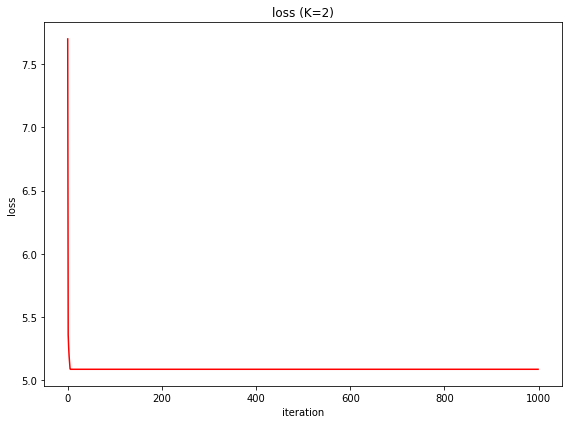

**************************************************
## [RESULT 06]
**************************************************


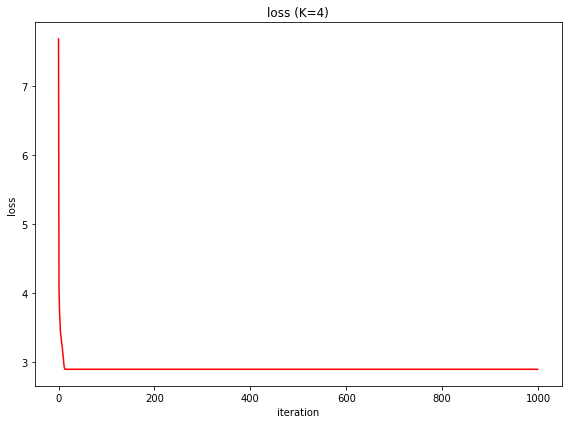

**************************************************
## [RESULT 07]
**************************************************


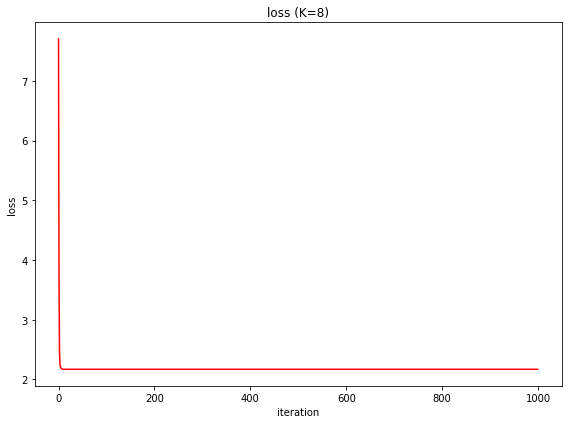

**************************************************
## [RESULT 08]
**************************************************


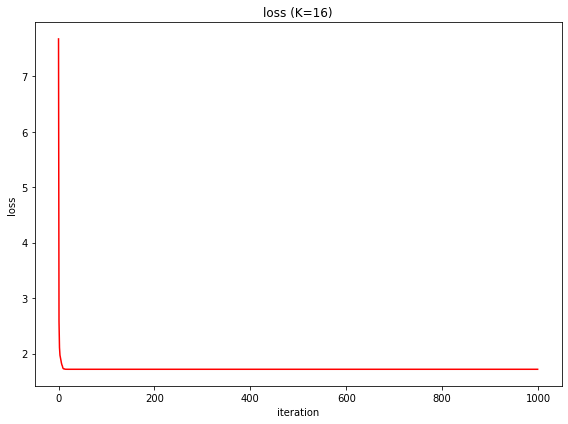

**************************************************
## [RESULT 09]
**************************************************


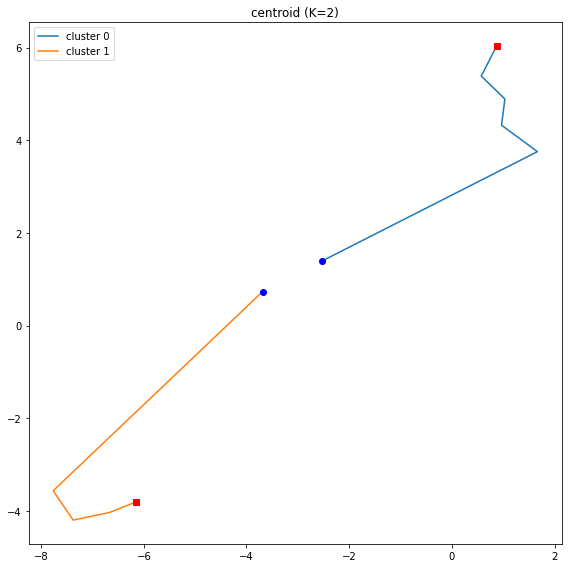

**************************************************
## [RESULT 10]
**************************************************


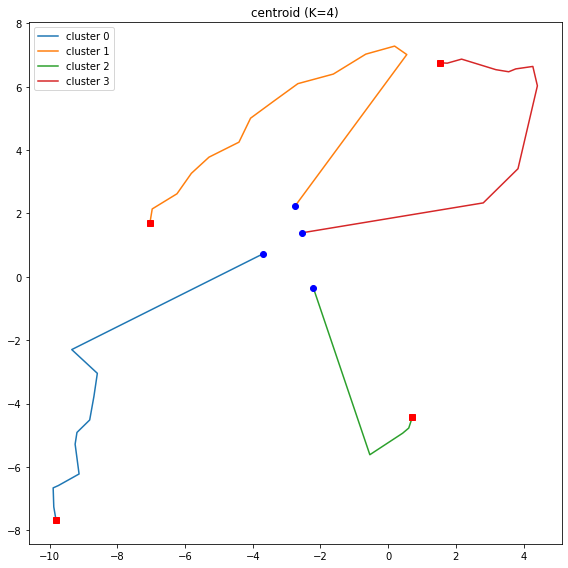

**************************************************
## [RESULT 11]
**************************************************


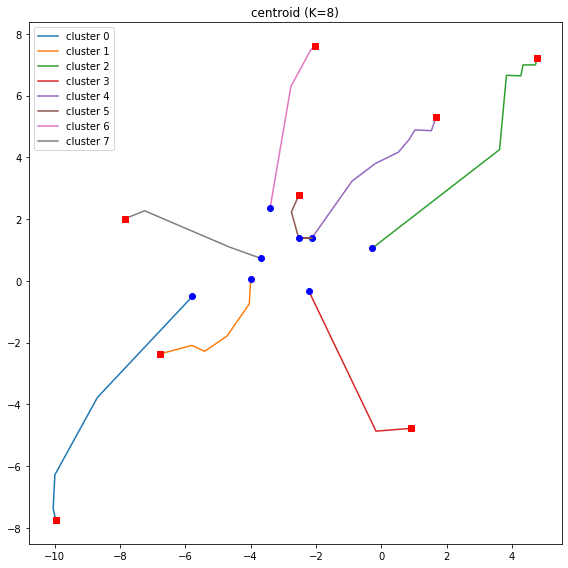

**************************************************
## [RESULT 12]
**************************************************


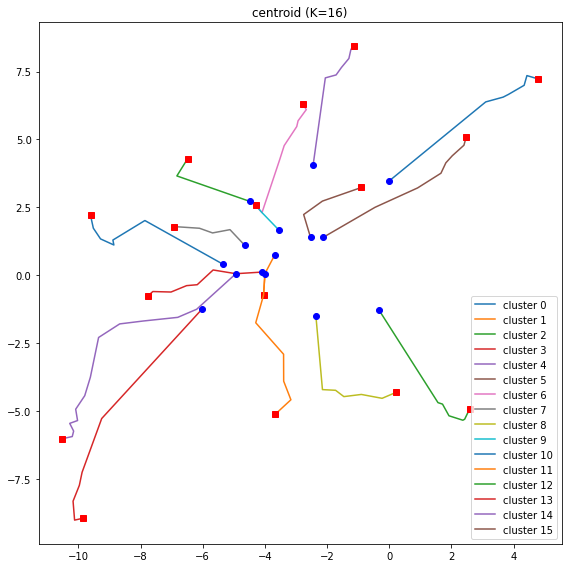

**************************************************
## [RESULT 13]
**************************************************


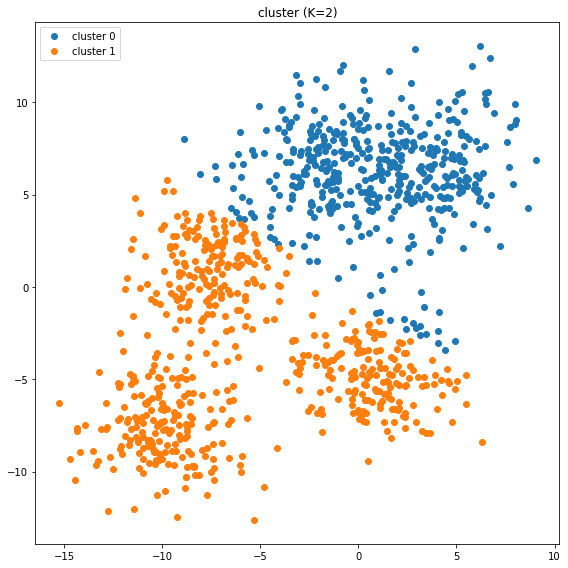

**************************************************
## [RESULT 14]
**************************************************


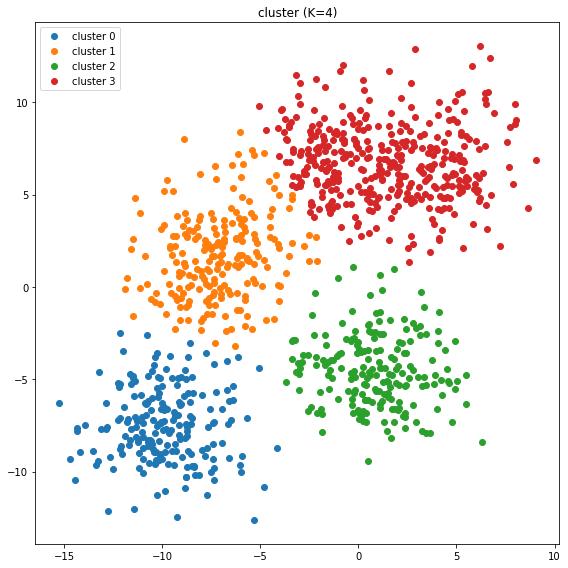

**************************************************
## [RESULT 15]
**************************************************


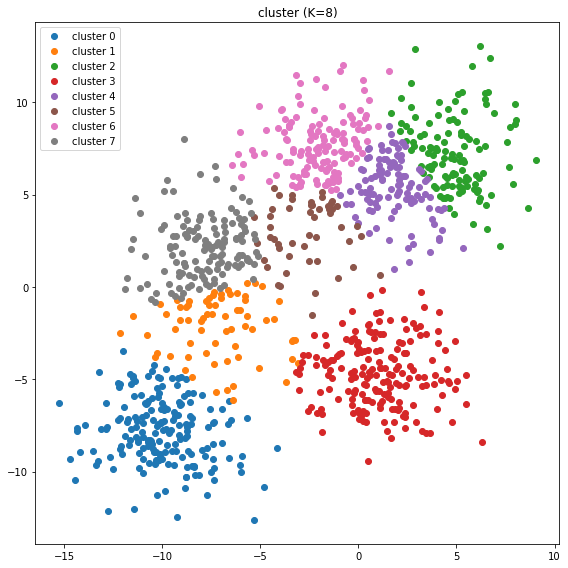

**************************************************
## [RESULT 16]
**************************************************


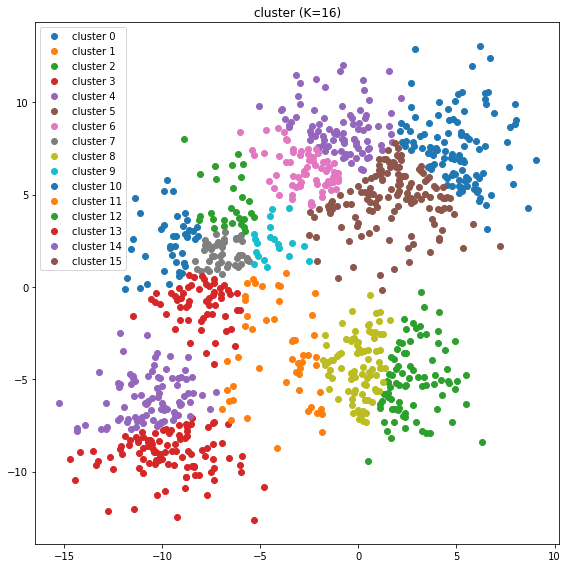

In [724]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)